In [30]:
# IMPORTS
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# SETTING UP THE FOLDERS
folder_link = "data"
fao_csv = folder_link + "/FAO.csv"
faostat_csv = folder_link + "/FAOSTAT.csv"

# Task 1: Data Wrangling

1. Data Cleaning:
- Load both datasets into Pandas DataFrames.
- Create a data dictionary.
- Check for and handle any missing values. Provide a brief explanation of the method you used to handle missing data.
- Remove any duplicate rows from both datasets.
- Standardize column names to ensure consistency between both datasets.



In [3]:
# Load both datasets

fao_df = pd.read_csv(fao_csv, encoding='ISO-8859-1')
faostat_df = pd.read_csv(faostat_csv, encoding='ISO-8859-1')

print('FAO.csv Datset')
print(fao_df.head())
print('FAOSTAT.csv Datset')
print(faostat_df.head())

FAO.csv Datset
  Area Abbreviation  Area Code         Area  Item Code  \
0               AFG          2  Afghanistan       2511   
1               AFG          2  Afghanistan       2805   
2               AFG          2  Afghanistan       2513   
3               AFG          2  Afghanistan       2513   
4               AFG          2  Afghanistan       2514   

                       Item  Element Code Element         Unit  latitude  \
0        Wheat and products          5142    Food  1000 tonnes     33.94   
1  Rice (Milled Equivalent)          5142    Food  1000 tonnes     33.94   
2       Barley and products          5521    Feed  1000 tonnes     33.94   
3       Barley and products          5142    Food  1000 tonnes     33.94   
4        Maize and products          5521    Feed  1000 tonnes     33.94   

   longitude  ...   Y2004   Y2005   Y2006   Y2007   Y2008   Y2009   Y2010  \
0      67.71  ...  3249.0  3486.0  3704.0  4164.0  4252.0  4538.0  4605.0   
1      67.71  ...   419.0

In [4]:
# Create a data dictionary 
# Data Dictionary Function
def create_data_dictionary(df):
    data_dict = {
        'Column Name': df.columns,
        'Data Type': df.dtypes,
        'Description': ['Description needed'] * len(df.columns)  # Placeholder for descriptions
    }
    return pd.DataFrame(data_dict)


# Generate data dictionaries using the function
faodata_dict = create_data_dictionary(fao_df)
faostatdata_dict = create_data_dictionary(faostat_df)


print("FAO Data Dictionary:\n", faodata_dict)
print("\nFAOSTAT Data Dictionary:\n", faostatdata_dict)

FAO Data Dictionary:
                          Column Name Data Type         Description
Area Abbreviation  Area Abbreviation    object  Description needed
Area Code                  Area Code     int64  Description needed
Area                            Area    object  Description needed
Item Code                  Item Code     int64  Description needed
Item                            Item    object  Description needed
...                              ...       ...                 ...
Y2009                          Y2009   float64  Description needed
Y2010                          Y2010   float64  Description needed
Y2011                          Y2011   float64  Description needed
Y2012                          Y2012     int64  Description needed
Y2013                          Y2013     int64  Description needed

[63 rows x 3 columns]

FAOSTAT Data Dictionary:
                        Column Name Data Type         Description
Domain Code            Domain Code    object  Description n

In [6]:
# Check for and handle any missing values. Provide a brief explanation of the method you used to handle missing data.

# Converting missing values (nulls) to zeroes
nonnull_fao_df = fao_df.dropna() #VERIFY - description says converting nulls to zeros but the code is for DROPPING
nonnull_faostat_df = faostat_df.dropna() ##VERIFY - description says converting nulls to zeros but the code is for DROPPING

print(nonnull_fao_df.info())
print(nonnull_faostat_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 17938 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  17938 non-null  object 
 1   Area Code          17938 non-null  int64  
 2   Area               17938 non-null  object 
 3   Item Code          17938 non-null  int64  
 4   Item               17938 non-null  object 
 5   Element Code       17938 non-null  int64  
 6   Element            17938 non-null  object 
 7   Unit               17938 non-null  object 
 8   latitude           17938 non-null  float64
 9   longitude          17938 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64
 16  Y1967              17938 no

In [7]:
# Removing Duplicatites
fao_df = nonnull_fao_df.drop_duplicates()
faostat_df = nonnull_faostat_df.drop_duplicates()

print(fao_df.info())
print(faostat_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 17938 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  17938 non-null  object 
 1   Area Code          17938 non-null  int64  
 2   Area               17938 non-null  object 
 3   Item Code          17938 non-null  int64  
 4   Item               17938 non-null  object 
 5   Element Code       17938 non-null  int64  
 6   Element            17938 non-null  object 
 7   Unit               17938 non-null  object 
 8   latitude           17938 non-null  float64
 9   longitude          17938 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64
 16  Y1967              17938 no

In [8]:
# Standardize column names to ensure consistency between both datasets.

# Change column names to uppercase
fao_df.columns = fao_df.columns.str.upper()
faostat_df.columns = faostat_df.columns.str.upper()

# Rename the 'Unit' column to 'UNIT_PERSONS'
fao_df.rename(columns={'UNIT': 'UNIT_TONNES'}, inplace = True)
faostat_df.rename(columns={'UNIT': 'UNIT_PERSONS'}, inplace=True)

# Change column with spaces replaced with underscores _
fao_df.columns = fao_df.columns.str.replace(' ', '_')
faostat_df.columns = faostat_df.columns.str.replace(' ', '_')


print(fao_df.info())
print(faostat_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 17938 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AREA_ABBREVIATION  17938 non-null  object 
 1   AREA_CODE          17938 non-null  int64  
 2   AREA               17938 non-null  object 
 3   ITEM_CODE          17938 non-null  int64  
 4   ITEM               17938 non-null  object 
 5   ELEMENT_CODE       17938 non-null  int64  
 6   ELEMENT            17938 non-null  object 
 7   UNIT_TONNES        17938 non-null  object 
 8   LATITUDE           17938 non-null  float64
 9   LONGITUDE          17938 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64
 16  Y1967              17938 no

2. Data Merging:
- Merge the two datasets using a relevant key (e.g., Country, Year, or any other common column). Justify your choice of the merging key(s).
- Create a new DataFrame with the merged data. Ensure the merged DataFrame contains only the columns necessary for analysis.

In [12]:
# Merge the two datasets using a relevant key (e.g., Country, Year, or any other common column). Justify your choice of the merging key(s).
# Create a new DataFrame with the merged data. Ensure the merged DataFrame contains only the columns necessary for analysis.

# Exclusions
removed_faostat_list = ['FLAG', 'FLAG_DESCRIPTION', 'NOTE', 'ITEM_CODE', 'DOMAIN_CODE', 'DOMAIN', 
                        'ELEMENT_CODE', 'ELEMENT', 'ITEM', 'YEAR_CODE', 'YEAR', 'UNIT_PERSONS', 'AREA']
removed_fao_list = ['UNIT_TONNES']

# Cleaned Datasets
cleaned_fao_df = fao_df.drop(columns=removed_fao_list)
cleaned_faostat_df = faostat_df.drop(columns=removed_faostat_list)

merged_df = pd.merge(cleaned_fao_df, cleaned_faostat_df, on=['AREA_CODE'], how='inner')

In [14]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17938 entries, 0 to 17937
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AREA_ABBREVIATION  17938 non-null  object 
 1   AREA_CODE          17938 non-null  int64  
 2   AREA               17938 non-null  object 
 3   ITEM_CODE          17938 non-null  int64  
 4   ITEM               17938 non-null  object 
 5   ELEMENT_CODE       17938 non-null  int64  
 6   ELEMENT            17938 non-null  object 
 7   LATITUDE           17938 non-null  float64
 8   LONGITUDE          17938 non-null  float64
 9   Y1961              17938 non-null  float64
 10  Y1962              17938 non-null  float64
 11  Y1963              17938 non-null  float64
 12  Y1964              17938 non-null  float64
 13  Y1965              17938 non-null  float64
 14  Y1966              17938 non-null  float64
 15  Y1967              17938 non-null  float64
 16  Y1968              179

3. Feature Engineering:
- Create at least two new columns based on the existing data. For example, you could calculate the per capita values or growth rates. Clearly explain the rationale behind these new features.

In [15]:
# Create at least two new columns based on the existing data. 
# For example, you could calculate the per capita values or growth rates. 
# Clearly explain the rationale behind these new features.

# Per decade code
merged_df['FOODNUM_60S'] = merged_df.loc[:, 'Y1961':'Y1969'].sum(axis=1)
merged_df['FOODNUM_70S'] = merged_df.loc[:, 'Y1970':'Y1979'].sum(axis=1)
merged_df['FOODNUM_80S'] = merged_df.loc[:, 'Y1980':'Y1989'].sum(axis=1)
merged_df['FOODNUM_90S'] = merged_df.loc[:, 'Y1990':'Y1999'].sum(axis=1)
merged_df['FOODNUM_00S'] = merged_df.loc[:, 'Y2000':'Y2009'].sum(axis=1)
merged_df['FOODNUM_10S'] = merged_df.loc[:, 'Y2010':'Y2013'].sum(axis=1)
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17938 entries, 0 to 17937
Data columns (total 69 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AREA_ABBREVIATION  17938 non-null  object 
 1   AREA_CODE          17938 non-null  int64  
 2   AREA               17938 non-null  object 
 3   ITEM_CODE          17938 non-null  int64  
 4   ITEM               17938 non-null  object 
 5   ELEMENT_CODE       17938 non-null  int64  
 6   ELEMENT            17938 non-null  object 
 7   LATITUDE           17938 non-null  float64
 8   LONGITUDE          17938 non-null  float64
 9   Y1961              17938 non-null  float64
 10  Y1962              17938 non-null  float64
 11  Y1963              17938 non-null  float64
 12  Y1964              17938 non-null  float64
 13  Y1965              17938 non-null  float64
 14  Y1966              17938 non-null  float64
 15  Y1967              17938 non-null  float64
 16  Y1968              179

In [18]:
# Define the mapping of countries to continents
country_to_continent = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'Angola': 'Africa',
    'Antigua and Barbuda': 'North America',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas': 'North America',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bermuda': 'North America',
    'Bolivia (Plurinational State of)': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Cabo Verde': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Chile': 'South America',
    'China, Hong Kong SAR': 'Asia',
    'China, Macao SAR': 'Asia',
    'China, mainland': 'Asia',
    'China, Taiwan Province of': 'Asia',
    'Colombia': 'South America',
    'Congo': 'Africa',
    'Costa Rica': 'North America',
    'Côte d\'Ivoire': 'Africa',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Democratic People\'s Republic of Korea': 'Asia',
    'Denmark': 'Europe',
    'Djibouti': 'Africa',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'El Salvador': 'North America',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'French Polynesia': 'Oceania',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Grenada': 'North America',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran (Islamic Republic of)': 'Asia',
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kiribati': 'Oceania',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Lao People\'s Democratic Republic': 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'New Caledonia': 'Oceania',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Norway': 'Europe',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Republic of Korea': 'Asia',
    'Republic of Moldova': 'Europe',
    'Romania': 'Europe',
    'Russian Federation': 'Europe',
    'Rwanda': 'Africa',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Oceania',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Sierra Leone': 'Africa',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania',
    'South Africa': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sudan': 'Africa',
    'Suriname': 'South America',
    'Swaziland': 'Africa',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Tajikistan': 'Asia',
    'Thailand': 'Asia',
    'The former Yugoslav Republic of Macedonia': 'Europe',
    'Timor-Leste': 'Asia',
    'Togo': 'Africa',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa',
    'Turkey': 'Asia',
    'Turkmenistan': 'Asia',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'United Republic of Tanzania': 'Africa',
    'United States of America': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Oceania',
    'Venezuela (Bolivarian Republic of)': 'South America',
    'Viet Nam': 'Asia',
    'Yemen': 'Asia',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa'
}

# Add the new 'CONTINENT' column to the dataset
merged_df['CONTINENT'] = merged_df['AREA'].map(country_to_continent)

# Display the first few rows to check the new column
merged_df.head()

,AREA_ABBREVIATION,AREA_CODE,AREA,ITEM_CODE,ITEM,ELEMENT_CODE,ELEMENT,LATITUDE,LONGITUDE,Y1961,...,Y2012,Y2013,VALUE,FOODNUM_60S,FOODNUM_70S,FOODNUM_80S,FOODNUM_90S,FOODNUM_00S,FOODNUM_10S,CONTINENT
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,33.94,67.71,1928.0,...,4810,4895,35530.081,17509.0,22767.0,19398.0,19699.0,34532.0,19021.0,Asia
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,33.94,67.71,183.0,...,425,422,35530.081,1887.0,2420.0,2110.0,2639.0,4461.0,1765.0,Asia
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,33.94,67.71,76.0,...,367,360,35530.081,671.0,709.0,516.0,448.0,1601.0,1245.0,Asia
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,33.94,67.71,237.0,...,78,89,35530.081,2106.0,2226.0,1626.0,1402.0,870.0,299.0,Asia
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,33.94,67.71,210.0,...,200,200,35530.081,1985.0,2240.0,1791.0,1179.0,1487.0,769.0,Asia


In [19]:
merged_df.columns

Index(['AREA_ABBREVIATION', 'AREA_CODE', 'AREA', 'ITEM_CODE', 'ITEM',
       'ELEMENT_CODE', 'ELEMENT', 'LATITUDE', 'LONGITUDE', 'Y1961', 'Y1962',
       'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970',
       'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978',
       'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986',
       'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994',
       'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002',
       'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010',
       'Y2011', 'Y2012', 'Y2013', 'VALUE', 'FOODNUM_60S', 'FOODNUM_70S',
       'FOODNUM_80S', 'FOODNUM_90S', 'FOODNUM_00S', 'FOODNUM_10S',
       'CONTINENT'],
      dtype='object')

# Task 2: Data Exploration

1. Descriptive Statistics:
    - Provide summary statistics for key variables of interest (mean, median, standard deviation, etc.).
    - Identify and discuss any significant patterns or outliers in the data.

In [20]:
# Provide summary statistics for key variables of interest (mean, median, standard deviation, etc.).
# Identify and discuss any significant patterns or outliers in the data.
merged_df.describe()

,AREA_CODE,ITEM_CODE,ELEMENT_CODE,LATITUDE,LONGITUDE,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2011,Y2012,Y2013,VALUE,FOODNUM_60S,FOODNUM_70S,FOODNUM_80S,FOODNUM_90S,FOODNUM_00S,FOODNUM_10S
count,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,...,17938.000000,17938.000000,17938.000000,1.793800e+04,1.793800e+04,1.793800e+04,1.793800e+04,1.793800e+04,1.793800e+04,1.793800e+04
mean,118.224886,2694.188817,5207.624596,15.773818,11.797621,195.262069,200.782250,205.464600,209.925577,217.556751,...,604.884157,617.519456,632.290501,5.137471e+04,1.968156e+03,2.739011e+03,3.399132e+03,4.238432e+03,5.305312e+03,2.443364e+03
std,69.701949,148.640459,143.409486,23.824765,70.773231,1864.124336,1884.265591,1861.174739,1862.000116,2014.934333,...,6389.826637,6591.464389,6774.620766,1.744264e+05,1.811512e+04,2.489052e+04,3.060385e+04,3.967015e+04,5.475194e+04,2.596043e+04
min,2.000000,2511.000000,5142.000000,-40.900000,-172.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-169.000000,-246.000000,5.534500e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.170000e+02
25%,56.000000,2561.000000,5142.000000,1.370000,-56.030000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.930187e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00
50%,115.000000,2641.000000,5142.000000,15.450000,12.570000,1.000000,1.000000,1.000000,1.000000,1.000000,...,8.000000,8.000000,8.000000,1.115977e+04,1.300000e+01,2.300000e+01,3.400000e+01,4.800000e+01,6.800000e+01,3.200000e+01
75%,174.000000,2782.000000,5142.000000,33.850000,45.080000,21.000000,22.000000,23.000000,24.000000,25.000000,...,90.000000,91.000000,94.000000,3.573958e+04,2.320000e+02,3.527500e+02,4.757500e+02,6.210000e+02,7.985000e+02,3.650000e+02
max,251.000000,2961.000000,5521.000000,64.960000,179.410000,112227.000000,109130.000000,106356.000000,104234.000000,119378.000000,...,462696.000000,479028.000000,489299.000000,1.409517e+06,1.050994e+06,1.308060e+06,1.800414e+06,2.047529e+06,3.731299e+06,1.882861e+06


2. Group-Based Analysis:

    - Perform a group-by operation based on a relevant categorical variable (e.g., Year, Country, or Region).
    - Analyze the aggregated data to identify trends over time or differences between groups. Visualize your findings using appropriate plots.

In [ ]:
# TO-DO


# merged_df.groupby('CONTINENT')
# print(merged_df)
# merged_df.groupby('ELEMENT')

3. Correlation Analysis:
    - Compute the correlation matrix for the numerical variables in your dataset.
    - Identify and discuss any strong correlations. Use a heatmap to visualize the correlation matrix.

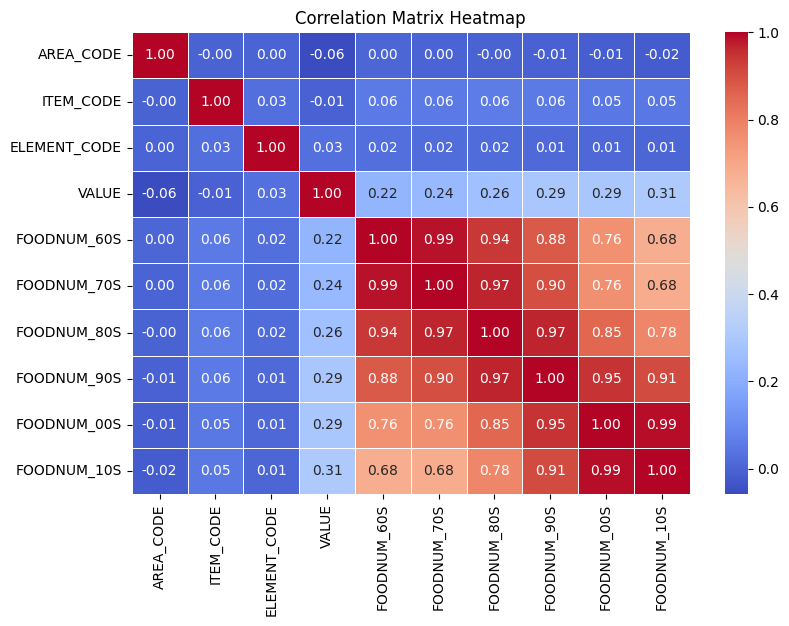

In [33]:
# NEEDS REVISIONS, variable should show POSITIVE CORRELATION
# List of columns to exclude
exclude_columns = ['Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970',
                   'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980',
                   'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990',
                   'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000',
                   'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010',
                   'Y2011', 'Y2012', 'Y2013', 'LATITUDE', 'LONGITUDE']


# Drop the columns to be excluded
numerical_columns = merged_df.drop(columns=exclude_columns)


# Select only the numerical columns from the remaining dataset
numerical_columns = numerical_columns.select_dtypes(include=['float64', 'int64'])


# Compute the correlation matrix for the numerical variables
correlation_matrix = numerical_columns.corr()


# Print the correlation matrix
# print(correlation_matrix)


# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Task 3: Data Visualization

1. Time Series Analysis:
    - Create a line plot showing trends over time for at least two variables. Ensure the plot is well-labeled and includes a legend.
    - Discuss any noticeable trends or patterns in the data over time.

In [ ]:
# Create a line plot showing trends over time for at least two variables.

*Discuss any noticeable trends or patterns in the data over time.*

2. Comparison Plot:
    - Create a bar chart or box plot to compare the distributions of a variable across different categories (e.g., regions, countries).
    - Provide insights based on your visualization.

In [ ]:
# Create a bar chart or box plot to compare the distributions of a variable across different categories (e.g., regions, countries).

*Provide insights based on your visualization.*

3. Geographical Visualization (Optional Advanced Task):
    - If applicable, create a choropleth map showing the distribution of a key variable across different countries or regions.
    - Analyze the geographical trends you observe.

In [ ]:
# If applicable, create a choropleth map showing the distribution of a key variable across different countries or regions.

*Analyze the geographical trends you observe.*

# Task 4: Drawing Conclusions


1. Analysis Summary:
    - Based on your analysis and visualizations, write a short report summarizing your findings.
    - Highlight key insights, trends, and any surprising results.
    - Discuss the potential implications of your findings in the context of global food security, agricultural production, or trade.

*INSERT INSIGHTS, FINDINGS, REPORT*

2. Actionable Recommendations:
    - Based on the data analysis, provide at least two recommendations for policymakers or stakeholders in the agriculture sector.
    - Justify your recommendations with specific references to the data and visualizations you’ve created.

*INSERT INSIGHTS, FINDINGS, REPORT*